In [1]:
#Transfer Learning

In [1]:
import numpy as np
import pandas as pd
import os
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split, KFold
from sklearn.metrics import mean_squared_error


import tensorflow.keras as keras


In [18]:
df = pd.read_csv(os.path.join("data", "final_df.csv"))
df

,Date 1,cell count,Absorbance,Date 2,pH,Temperature (C),D.O. (mg/L),Turbidity (NTU),NO3-N (mg/L),NH4-N (mg/L),ORP (MV),Conductivity (mS/cm),Total COD (mg/L),Soluable COD (mg/L),Date,max_temp,min_temp,max_lux,ave_lux,total_rain
0,25-Jul,102.0,0.64,2020-07-25 09:30:00,6.74,15.99,9.84,107.16,11.96,23.50,147.27,0.92,447,257,2020-07-25,20.2,14.2,568.7,188.546875,8.6
1,26-Jul,88.8,0.55,2020-07-26 09:30:00,6.85,17.49,10.77,94.29,13.54,23.55,148.10,0.78,378,66,2020-07-26,21.1,15.9,1032.2,227.014583,30.4
2,27-Jul,99.1,0.58,2020-07-27 09:30:00,6.98,12.96,11.48,97.10,17.28,27.97,133.23,0.80,354,66,2020-07-27,23.5,12.3,1163.5,397.067708,1.8
3,28-Jul,99.0,0.57,2020-07-28 09:30:00,7.06,12.25,11.86,99.01,20.19,32.24,122.15,0.82,357,57,2020-07-28,19.4,9.6,1502.3,461.630208,0.0
4,29-Jul,92.2,0.60,2020-07-29 09:30:00,6.94,11.69,11.69,99.58,23.18,32.94,122.98,0.84,374,57,2020-07-29,21.9,6.6,1690.0,560.932292,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,31-Mar,117.0,0.20,2021-03-31 09:41:00,9.28,19.37,13.71,116.58,5.86,17.11,-20.89,1.14,324,38,2021-03-31,25.9,19.0,1455.7,703.503390,0.0
130,2-Apr,174.0,0.27,2021-04-02 09:42:00,9.35,20.12,13.81,121.21,6.28,17.49,-19.10,1.25,367,33,2021-04-02,28.0,18.6,2118.0,845.129167,8.0
131,2-Jun,132.0,0.28,2021-06-02 09:38:00,8.23,15.84,13.06,106.86,24.77,0.10,34.29,2.36,243,58,2021-06-02,28.7,20.4,2013.5,883.084375,0.0
132,2-Jul,89.8,0.19,2021-07-02 09:35:00,7.54,17.08,5.96,65.34,21.20,1.44,178.29,2.59,170,79,2021-07-02,29.0,22.4,2096.2,911.820833,0.0


In [23]:
df['Date 2'] = pd.to_datetime(df['Date 2']) 
df['Day'] = (df['Date 2'] - df['Date 2'].min())  / np.timedelta64(1,'D')
df_no_date = df.drop(columns=['Date 1', 'Date 2', 'Date', 'Day'])
df_no_date = df_no_date.drop(columns=['Absorbance', 'Soluable COD (mg/L)','Total COD (mg/L)','Turbidity (NTU)','max_temp', 'min_temp', 'max_lux', 'ave_lux', 'total_rain'])
x_arr = np.array(df_no_date.drop(columns=['cell count']), np.float32)
x_shaped = x_arr.reshape(x_arr.shape[0], 1, x_arr.shape[1])

y_shaped = df_no_date['cell count'].values

kf = KFold(n_splits=5, shuffle=True)
kf.get_n_splits(x_shaped)

print(kf)


KFold(n_splits=5, random_state=None, shuffle=True)


In [24]:
df_no_date

,cell count,pH,Temperature (C),D.O. (mg/L),NO3-N (mg/L),NH4-N (mg/L),ORP (MV),Conductivity (mS/cm)
0,102.0,6.74,15.99,9.84,11.96,23.50,147.27,0.92
1,88.8,6.85,17.49,10.77,13.54,23.55,148.10,0.78
2,99.1,6.98,12.96,11.48,17.28,27.97,133.23,0.80
3,99.0,7.06,12.25,11.86,20.19,32.24,122.15,0.82
4,92.2,6.94,11.69,11.69,23.18,32.94,122.98,0.84
...,...,...,...,...,...,...,...,...
129,117.0,9.28,19.37,13.71,5.86,17.11,-20.89,1.14
130,174.0,9.35,20.12,13.81,6.28,17.49,-19.10,1.25
131,132.0,8.23,15.84,13.06,24.77,0.10,34.29,2.36
132,89.8,7.54,17.08,5.96,21.20,1.44,178.29,2.59


In [25]:
model = keras.models.load_model('best_model')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, None, 100)         32700     
                                                                 
 gru_1 (GRU)                 (None, None, 144)         106272    
                                                                 
 reshape (Reshape)           (None, 12, 12)            0         
                                                                 
 conv1d (Conv1D)             (None, 12, 128)           6272      
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 64)            32832     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 6, 64)            0         
 )                                                               
                                                        

In [26]:
#Freeze layers   
for layer in model.layers[:6]:
    layer.trainable = False

In [146]:
model = keras.models.load_model('best_model_cell_count')
old_rmse = model.evaluate(x_test, y_test)[1]

1/1 [==============================] - 0s 403ms/step - loss: 74.4757 - root_mean_squared_error: 8.6299


In [147]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.0005),  
              loss='mse',
              metrics=[keras.metrics.RootMeanSquaredError()]
        )

In [148]:
models = []
histories = []  
model_evals = []
early_stopping = keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True, monitor='loss')
for train_index, test_index in kf.split(x_shaped):
    x_train, x_test = x_shaped[train_index], x_shaped[test_index]
    y_train, y_test = y_shaped[train_index], y_shaped[test_index]

    history = model.fit(x_train,y_train,epochs=1000, callbacks=[early_stopping])
    
    model_eval = model.evaluate(x_test, y_test)
    models.append(model)
    histories.append(history)
    model_evals.append(model_eval)
        

Epoch 1/1000
4/4 [==============================] - 2s 5ms/step - loss: 115.1327 - root_mean_squared_error: 10.7300
Epoch 2/1000
4/4 [==============================] - 0s 5ms/step - loss: 107.0891 - root_mean_squared_error: 10.3484
Epoch 3/1000
4/4 [==============================] - 0s 5ms/step - loss: 108.3571 - root_mean_squared_error: 10.4095
Epoch 4/1000
4/4 [==============================] - 0s 4ms/step - loss: 108.9066 - root_mean_squared_error: 10.4358
Epoch 5/1000
4/4 [==============================] - 0s 5ms/step - loss: 105.7013 - root_mean_squared_error: 10.2811
Epoch 6/1000
4/4 [==============================] - 0s 4ms/step - loss: 107.0729 - root_mean_squared_error: 10.3476
Epoch 7/1000
4/4 [==============================] - 0s 4ms/step - loss: 106.6969 - root_mean_squared_error: 10.3294
Epoch 8/1000
4/4 [==============================] - 0s 4ms/step - loss: 105.3240 - root_mean_squared_error: 10.2627
Epoch 9/1000
4/4 [==============================] - 0s 4ms/step - loss: 

4/4 [==============================] - 0s 4ms/step - loss: 105.9490 - root_mean_squared_error: 10.2932
Epoch 72/1000
4/4 [==============================] - 0s 4ms/step - loss: 107.9564 - root_mean_squared_error: 10.3902
Epoch 73/1000
4/4 [==============================] - 0s 5ms/step - loss: 103.0991 - root_mean_squared_error: 10.1538
Epoch 74/1000
4/4 [==============================] - 0s 4ms/step - loss: 104.3445 - root_mean_squared_error: 10.2149
Epoch 75/1000
4/4 [==============================] - 0s 4ms/step - loss: 104.5282 - root_mean_squared_error: 10.2239
Epoch 76/1000
4/4 [==============================] - 0s 4ms/step - loss: 102.6551 - root_mean_squared_error: 10.1319
Epoch 77/1000
4/4 [==============================] - 0s 4ms/step - loss: 102.3524 - root_mean_squared_error: 10.1169
Epoch 78/1000
4/4 [==============================] - 0s 3ms/step - loss: 103.2290 - root_mean_squared_error: 10.1602
Epoch 79/1000
4/4 [==============================] - 0s 3ms/step - loss: 102.9

4/4 [==============================] - 0s 3ms/step - loss: 102.4828 - root_mean_squared_error: 10.1234
Epoch 141/1000
4/4 [==============================] - 0s 3ms/step - loss: 106.0467 - root_mean_squared_error: 10.2979
Epoch 142/1000
4/4 [==============================] - 0s 3ms/step - loss: 101.9759 - root_mean_squared_error: 10.0983
Epoch 143/1000
4/4 [==============================] - 0s 3ms/step - loss: 101.6235 - root_mean_squared_error: 10.0809
Epoch 144/1000
4/4 [==============================] - 0s 3ms/step - loss: 103.5966 - root_mean_squared_error: 10.1782
Epoch 145/1000
4/4 [==============================] - 0s 3ms/step - loss: 105.9695 - root_mean_squared_error: 10.2941
Epoch 146/1000
4/4 [==============================] - 0s 3ms/step - loss: 104.7789 - root_mean_squared_error: 10.2362
Epoch 147/1000
4/4 [==============================] - 0s 3ms/step - loss: 104.4624 - root_mean_squared_error: 10.2207
Epoch 148/1000
4/4 [==============================] - 0s 3ms/step - los

4/4 [==============================] - 0s 4ms/step - loss: 102.4501 - root_mean_squared_error: 10.1218
Epoch 210/1000
4/4 [==============================] - 0s 4ms/step - loss: 104.8578 - root_mean_squared_error: 10.2400
Epoch 211/1000
4/4 [==============================] - 0s 4ms/step - loss: 101.7275 - root_mean_squared_error: 10.0860
Epoch 212/1000
4/4 [==============================] - 0s 4ms/step - loss: 102.7291 - root_mean_squared_error: 10.1355
Epoch 213/1000
4/4 [==============================] - 0s 4ms/step - loss: 108.0360 - root_mean_squared_error: 10.3940
Epoch 214/1000
4/4 [==============================] - 0s 5ms/step - loss: 100.0766 - root_mean_squared_error: 10.0038
Epoch 215/1000
4/4 [==============================] - 0s 4ms/step - loss: 100.2314 - root_mean_squared_error: 10.0116
Epoch 216/1000
4/4 [==============================] - 0s 4ms/step - loss: 102.1056 - root_mean_squared_error: 10.1047
Epoch 217/1000
4/4 [==============================] - 0s 4ms/step - los

4/4 [==============================] - 0s 3ms/step - loss: 100.3185 - root_mean_squared_error: 10.0159
Epoch 279/1000
4/4 [==============================] - 0s 4ms/step - loss: 103.9332 - root_mean_squared_error: 10.1948
Epoch 280/1000
4/4 [==============================] - 0s 4ms/step - loss: 101.3136 - root_mean_squared_error: 10.0655
Epoch 281/1000
4/4 [==============================] - 0s 4ms/step - loss: 101.8498 - root_mean_squared_error: 10.0921
Epoch 282/1000
4/4 [==============================] - 0s 4ms/step - loss: 101.3178 - root_mean_squared_error: 10.0657
Epoch 283/1000
4/4 [==============================] - 0s 4ms/step - loss: 99.7689 - root_mean_squared_error: 9.9884
Epoch 284/1000
4/4 [==============================] - 0s 4ms/step - loss: 106.0661 - root_mean_squared_error: 10.2988
Epoch 285/1000
4/4 [==============================] - 0s 4ms/step - loss: 100.1158 - root_mean_squared_error: 10.0058
Epoch 286/1000
4/4 [==============================] - 0s 4ms/step - loss:

4/4 [==============================] - 0s 3ms/step - loss: 98.8602 - root_mean_squared_error: 9.9428
Epoch 348/1000
4/4 [==============================] - 0s 3ms/step - loss: 99.7598 - root_mean_squared_error: 9.9880
Epoch 349/1000
4/4 [==============================] - 0s 4ms/step - loss: 101.1926 - root_mean_squared_error: 10.0595
Epoch 350/1000
4/4 [==============================] - 0s 3ms/step - loss: 98.8329 - root_mean_squared_error: 9.9415
Epoch 351/1000
4/4 [==============================] - 0s 3ms/step - loss: 102.8656 - root_mean_squared_error: 10.1423
Epoch 352/1000
4/4 [==============================] - 0s 3ms/step - loss: 103.8251 - root_mean_squared_error: 10.1895
Epoch 353/1000
4/4 [==============================] - 0s 3ms/step - loss: 101.5486 - root_mean_squared_error: 10.0771
Epoch 354/1000
4/4 [==============================] - 0s 3ms/step - loss: 104.6256 - root_mean_squared_error: 10.2287
Epoch 355/1000
4/4 [==============================] - 0s 3ms/step - loss: 100

4/4 [==============================] - 0s 3ms/step - loss: 98.3156 - root_mean_squared_error: 9.9154
Epoch 418/1000
4/4 [==============================] - 0s 3ms/step - loss: 104.5502 - root_mean_squared_error: 10.2250
Epoch 419/1000
4/4 [==============================] - 0s 3ms/step - loss: 100.4953 - root_mean_squared_error: 10.0247
Epoch 420/1000
4/4 [==============================] - 0s 3ms/step - loss: 99.3395 - root_mean_squared_error: 9.9669
Epoch 421/1000
4/4 [==============================] - 0s 3ms/step - loss: 99.4595 - root_mean_squared_error: 9.9729
Epoch 422/1000
4/4 [==============================] - 0s 3ms/step - loss: 98.4544 - root_mean_squared_error: 9.9224
Epoch 423/1000
4/4 [==============================] - 0s 4ms/step - loss: 97.9721 - root_mean_squared_error: 9.8981
Epoch 424/1000
4/4 [==============================] - 0s 4ms/step - loss: 103.0627 - root_mean_squared_error: 10.1520
Epoch 425/1000
4/4 [==============================] - 0s 4ms/step - loss: 99.5145

4/4 [==============================] - 0s 4ms/step - loss: 98.3233 - root_mean_squared_error: 9.9158
Epoch 488/1000
4/4 [==============================] - 0s 4ms/step - loss: 98.8150 - root_mean_squared_error: 9.9406
Epoch 489/1000
4/4 [==============================] - 0s 4ms/step - loss: 99.7654 - root_mean_squared_error: 9.9883
Epoch 490/1000
4/4 [==============================] - 0s 4ms/step - loss: 99.9735 - root_mean_squared_error: 9.9987
Epoch 491/1000
4/4 [==============================] - 0s 5ms/step - loss: 97.1902 - root_mean_squared_error: 9.8585
Epoch 492/1000
4/4 [==============================] - 0s 4ms/step - loss: 100.4778 - root_mean_squared_error: 10.0239
Epoch 493/1000
4/4 [==============================] - 0s 3ms/step - loss: 102.9449 - root_mean_squared_error: 10.1462
Epoch 494/1000
4/4 [==============================] - 0s 3ms/step - loss: 98.0059 - root_mean_squared_error: 9.8998
Epoch 495/1000
4/4 [==============================] - 0s 3ms/step - loss: 98.9398 -

4/4 [==============================] - 0s 4ms/step - loss: 100.8477 - root_mean_squared_error: 10.0423
Epoch 558/1000
4/4 [==============================] - 0s 4ms/step - loss: 100.3957 - root_mean_squared_error: 10.0198
Epoch 559/1000
4/4 [==============================] - 0s 4ms/step - loss: 98.0467 - root_mean_squared_error: 9.9019
Epoch 560/1000
4/4 [==============================] - 0s 4ms/step - loss: 98.0780 - root_mean_squared_error: 9.9034
Epoch 561/1000
4/4 [==============================] - 0s 4ms/step - loss: 99.8617 - root_mean_squared_error: 9.9931
Epoch 562/1000
4/4 [==============================] - 0s 4ms/step - loss: 97.7688 - root_mean_squared_error: 9.8878
Epoch 563/1000
4/4 [==============================] - 0s 4ms/step - loss: 100.8115 - root_mean_squared_error: 10.0405
Epoch 564/1000
4/4 [==============================] - 0s 4ms/step - loss: 97.2011 - root_mean_squared_error: 9.8591
Epoch 565/1000
4/4 [==============================] - 0s 4ms/step - loss: 99.1325

4/4 [==============================] - 0s 3ms/step - loss: 96.6914 - root_mean_squared_error: 9.8332
Epoch 628/1000
4/4 [==============================] - 0s 3ms/step - loss: 104.1933 - root_mean_squared_error: 10.2075
Epoch 629/1000
4/4 [==============================] - 0s 4ms/step - loss: 96.4529 - root_mean_squared_error: 9.8210
Epoch 630/1000
4/4 [==============================] - 0s 3ms/step - loss: 97.6926 - root_mean_squared_error: 9.8840
Epoch 631/1000
4/4 [==============================] - 0s 3ms/step - loss: 98.1380 - root_mean_squared_error: 9.9065
Epoch 632/1000
4/4 [==============================] - 0s 3ms/step - loss: 96.6355 - root_mean_squared_error: 9.8303
Epoch 633/1000
4/4 [==============================] - 0s 4ms/step - loss: 97.0419 - root_mean_squared_error: 9.8510
Epoch 634/1000
4/4 [==============================] - 0s 4ms/step - loss: 99.2032 - root_mean_squared_error: 9.9601
Epoch 635/1000
4/4 [==============================] - 0s 4ms/step - loss: 98.3214 - r

4/4 [==============================] - 0s 4ms/step - loss: 97.1669 - root_mean_squared_error: 9.8573
Epoch 698/1000
4/4 [==============================] - 0s 4ms/step - loss: 99.1579 - root_mean_squared_error: 9.9578
Epoch 699/1000
4/4 [==============================] - 0s 3ms/step - loss: 101.0752 - root_mean_squared_error: 10.0536
Epoch 700/1000
4/4 [==============================] - 0s 4ms/step - loss: 96.8056 - root_mean_squared_error: 9.8390
Epoch 701/1000
4/4 [==============================] - 0s 4ms/step - loss: 96.2430 - root_mean_squared_error: 9.8104
Epoch 702/1000
4/4 [==============================] - 0s 3ms/step - loss: 99.0743 - root_mean_squared_error: 9.9536
Epoch 703/1000
4/4 [==============================] - 0s 3ms/step - loss: 99.0042 - root_mean_squared_error: 9.9501
Epoch 704/1000
4/4 [==============================] - 0s 3ms/step - loss: 100.5270 - root_mean_squared_error: 10.0263
Epoch 705/1000
4/4 [==============================] - 0s 3ms/step - loss: 96.7529 -

4/4 [==============================] - 0s 4ms/step - loss: 96.4319 - root_mean_squared_error: 9.8200
Epoch 768/1000
4/4 [==============================] - 0s 4ms/step - loss: 96.5470 - root_mean_squared_error: 9.8258
Epoch 769/1000
4/4 [==============================] - 0s 3ms/step - loss: 99.9169 - root_mean_squared_error: 9.9958
Epoch 770/1000
4/4 [==============================] - 0s 3ms/step - loss: 99.3809 - root_mean_squared_error: 9.9690
Epoch 771/1000
4/4 [==============================] - 0s 3ms/step - loss: 96.2043 - root_mean_squared_error: 9.8084
Epoch 772/1000
4/4 [==============================] - 0s 3ms/step - loss: 96.0426 - root_mean_squared_error: 9.8001
Epoch 773/1000
4/4 [==============================] - 0s 3ms/step - loss: 97.3215 - root_mean_squared_error: 9.8652
Epoch 774/1000
4/4 [==============================] - 0s 3ms/step - loss: 99.0992 - root_mean_squared_error: 9.9549
Epoch 775/1000
4/4 [==============================] - 0s 4ms/step - loss: 96.4000 - roo

4/4 [==============================] - 0s 5ms/step - loss: 97.0889 - root_mean_squared_error: 9.8534
Epoch 838/1000
4/4 [==============================] - 0s 4ms/step - loss: 96.4920 - root_mean_squared_error: 9.8230
Epoch 839/1000
4/4 [==============================] - 0s 3ms/step - loss: 96.1067 - root_mean_squared_error: 9.8034
Epoch 840/1000
4/4 [==============================] - 0s 3ms/step - loss: 96.0056 - root_mean_squared_error: 9.7982
Epoch 841/1000
4/4 [==============================] - 0s 3ms/step - loss: 98.2849 - root_mean_squared_error: 9.9139
Epoch 842/1000
4/4 [==============================] - 0s 3ms/step - loss: 95.7889 - root_mean_squared_error: 9.7872
Epoch 843/1000
4/4 [==============================] - 0s 3ms/step - loss: 96.1968 - root_mean_squared_error: 9.8080
Epoch 844/1000
4/4 [==============================] - 0s 3ms/step - loss: 99.6464 - root_mean_squared_error: 9.9823
Epoch 845/1000
4/4 [==============================] - 0s 4ms/step - loss: 97.0494 - roo

4/4 [==============================] - 0s 4ms/step - loss: 95.6610 - root_mean_squared_error: 9.7806
Epoch 908/1000
4/4 [==============================] - 0s 4ms/step - loss: 97.2366 - root_mean_squared_error: 9.8609
Epoch 909/1000
4/4 [==============================] - 0s 3ms/step - loss: 95.1964 - root_mean_squared_error: 9.7569
Epoch 910/1000
4/4 [==============================] - 0s 3ms/step - loss: 99.1393 - root_mean_squared_error: 9.9569
Epoch 911/1000
4/4 [==============================] - 0s 3ms/step - loss: 98.4451 - root_mean_squared_error: 9.9220
Epoch 912/1000
4/4 [==============================] - 0s 4ms/step - loss: 97.6156 - root_mean_squared_error: 9.8801
Epoch 913/1000
4/4 [==============================] - 0s 4ms/step - loss: 98.5516 - root_mean_squared_error: 9.9273
Epoch 914/1000
4/4 [==============================] - 0s 4ms/step - loss: 95.8994 - root_mean_squared_error: 9.7928
Epoch 915/1000
4/4 [==============================] - 0s 4ms/step - loss: 97.6127 - roo

4/4 [==============================] - 0s 4ms/step - loss: 100.9622 - root_mean_squared_error: 10.0480
Epoch 978/1000
4/4 [==============================] - 0s 4ms/step - loss: 98.4235 - root_mean_squared_error: 9.9209
Epoch 979/1000
4/4 [==============================] - 0s 3ms/step - loss: 98.3630 - root_mean_squared_error: 9.9178
Epoch 980/1000
4/4 [==============================] - 0s 3ms/step - loss: 95.1261 - root_mean_squared_error: 9.7533
Epoch 981/1000
4/4 [==============================] - 0s 3ms/step - loss: 96.0770 - root_mean_squared_error: 9.8019
Epoch 982/1000
4/4 [==============================] - 0s 3ms/step - loss: 100.4528 - root_mean_squared_error: 10.0226
Epoch 983/1000
4/4 [==============================] - 0s 4ms/step - loss: 94.4370 - root_mean_squared_error: 9.7179
Epoch 984/1000
4/4 [==============================] - 0s 4ms/step - loss: 99.2660 - root_mean_squared_error: 9.9632
Epoch 985/1000
4/4 [==============================] - 0s 3ms/step - loss: 95.4006 -

4/4 [==============================] - 0s 4ms/step - loss: 77.3185 - root_mean_squared_error: 8.7931
Epoch 48/1000
4/4 [==============================] - 0s 4ms/step - loss: 75.8529 - root_mean_squared_error: 8.7094
Epoch 49/1000
4/4 [==============================] - 0s 4ms/step - loss: 74.7539 - root_mean_squared_error: 8.6460
Epoch 50/1000
4/4 [==============================] - 0s 7ms/step - loss: 78.3985 - root_mean_squared_error: 8.8543
Epoch 51/1000
4/4 [==============================] - 0s 5ms/step - loss: 76.4622 - root_mean_squared_error: 8.7443
Epoch 52/1000
4/4 [==============================] - 0s 4ms/step - loss: 75.6386 - root_mean_squared_error: 8.6970
Epoch 53/1000
4/4 [==============================] - 0s 4ms/step - loss: 77.9900 - root_mean_squared_error: 8.8312
Epoch 54/1000
4/4 [==============================] - 0s 3ms/step - loss: 76.9073 - root_mean_squared_error: 8.7697
Epoch 55/1000
4/4 [==============================] - 0s 3ms/step - loss: 76.0630 - root_mean_s

4/4 [==============================] - 0s 4ms/step - loss: 76.0662 - root_mean_squared_error: 8.7216
Epoch 119/1000
4/4 [==============================] - 0s 4ms/step - loss: 72.4831 - root_mean_squared_error: 8.5137
Epoch 120/1000
4/4 [==============================] - 0s 4ms/step - loss: 71.6957 - root_mean_squared_error: 8.4673
Epoch 121/1000
4/4 [==============================] - 0s 3ms/step - loss: 73.2729 - root_mean_squared_error: 8.5600
Epoch 122/1000
4/4 [==============================] - 0s 3ms/step - loss: 74.0458 - root_mean_squared_error: 8.6050
Epoch 123/1000
4/4 [==============================] - 0s 3ms/step - loss: 71.7459 - root_mean_squared_error: 8.4703
Epoch 124/1000
4/4 [==============================] - 0s 4ms/step - loss: 71.4739 - root_mean_squared_error: 8.4542
Epoch 125/1000
4/4 [==============================] - 0s 4ms/step - loss: 71.4518 - root_mean_squared_error: 8.4529
Epoch 126/1000
4/4 [==============================] - 0s 4ms/step - loss: 75.9217 - roo

4/4 [==============================] - 0s 4ms/step - loss: 70.3197 - root_mean_squared_error: 8.3857
Epoch 189/1000
4/4 [==============================] - 0s 4ms/step - loss: 69.6635 - root_mean_squared_error: 8.3465
Epoch 190/1000
4/4 [==============================] - 0s 4ms/step - loss: 71.4624 - root_mean_squared_error: 8.4535
Epoch 191/1000
4/4 [==============================] - 0s 4ms/step - loss: 77.7006 - root_mean_squared_error: 8.8148
Epoch 192/1000
4/4 [==============================] - 0s 4ms/step - loss: 71.4446 - root_mean_squared_error: 8.4525
Epoch 193/1000
4/4 [==============================] - 0s 4ms/step - loss: 72.5583 - root_mean_squared_error: 8.5181
Epoch 194/1000
4/4 [==============================] - 0s 4ms/step - loss: 70.3448 - root_mean_squared_error: 8.3872
Epoch 195/1000
4/4 [==============================] - 0s 4ms/step - loss: 69.3783 - root_mean_squared_error: 8.3294
Epoch 196/1000
4/4 [==============================] - 0s 4ms/step - loss: 74.3533 - roo

4/4 [==============================] - 0s 4ms/step - loss: 68.7828 - root_mean_squared_error: 8.2935
Epoch 259/1000
4/4 [==============================] - 0s 4ms/step - loss: 68.9687 - root_mean_squared_error: 8.3047
Epoch 260/1000
4/4 [==============================] - 0s 4ms/step - loss: 70.5323 - root_mean_squared_error: 8.3984
Epoch 261/1000
4/4 [==============================] - 0s 4ms/step - loss: 68.9839 - root_mean_squared_error: 8.3057
Epoch 262/1000
4/4 [==============================] - 0s 4ms/step - loss: 68.8224 - root_mean_squared_error: 8.2959
Epoch 263/1000
4/4 [==============================] - 0s 4ms/step - loss: 68.6524 - root_mean_squared_error: 8.2857
Epoch 264/1000
4/4 [==============================] - 0s 4ms/step - loss: 71.1002 - root_mean_squared_error: 8.4321
Epoch 265/1000
4/4 [==============================] - 0s 4ms/step - loss: 68.5488 - root_mean_squared_error: 8.2794
Epoch 266/1000
4/4 [==============================] - 0s 4ms/step - loss: 71.4352 - roo

4/4 [==============================] - 0s 4ms/step - loss: 69.7530 - root_mean_squared_error: 8.3518
Epoch 329/1000
4/4 [==============================] - 0s 4ms/step - loss: 69.7215 - root_mean_squared_error: 8.3499
Epoch 330/1000
4/4 [==============================] - 0s 4ms/step - loss: 69.4362 - root_mean_squared_error: 8.3328
Epoch 331/1000
4/4 [==============================] - 0s 5ms/step - loss: 72.3503 - root_mean_squared_error: 8.5059
Epoch 332/1000
4/4 [==============================] - 0s 4ms/step - loss: 67.7138 - root_mean_squared_error: 8.2288
Epoch 333/1000
4/4 [==============================] - 0s 4ms/step - loss: 67.5683 - root_mean_squared_error: 8.2200
Epoch 334/1000
4/4 [==============================] - 0s 4ms/step - loss: 69.5023 - root_mean_squared_error: 8.3368
Epoch 335/1000
4/4 [==============================] - 0s 3ms/step - loss: 68.0608 - root_mean_squared_error: 8.2499
Epoch 336/1000
4/4 [==============================] - 0s 4ms/step - loss: 67.7891 - roo

4/4 [==============================] - 0s 3ms/step - loss: 67.5724 - root_mean_squared_error: 8.2202
Epoch 399/1000
4/4 [==============================] - 0s 3ms/step - loss: 67.6274 - root_mean_squared_error: 8.2236
Epoch 400/1000
4/4 [==============================] - 0s 4ms/step - loss: 66.7602 - root_mean_squared_error: 8.1707
Epoch 401/1000
4/4 [==============================] - 0s 4ms/step - loss: 66.3070 - root_mean_squared_error: 8.1429
Epoch 402/1000
4/4 [==============================] - 0s 4ms/step - loss: 69.1352 - root_mean_squared_error: 8.3148
Epoch 403/1000
4/4 [==============================] - 0s 4ms/step - loss: 67.7312 - root_mean_squared_error: 8.2299
Epoch 404/1000
4/4 [==============================] - 0s 4ms/step - loss: 68.6672 - root_mean_squared_error: 8.2866
Epoch 405/1000
4/4 [==============================] - 0s 4ms/step - loss: 66.7177 - root_mean_squared_error: 8.1681
Epoch 406/1000
4/4 [==============================] - 0s 4ms/step - loss: 68.1710 - roo

4/4 [==============================] - 0s 4ms/step - loss: 66.8508 - root_mean_squared_error: 8.1762
Epoch 469/1000
4/4 [==============================] - 0s 4ms/step - loss: 66.2828 - root_mean_squared_error: 8.1414
Epoch 470/1000
4/4 [==============================] - 0s 4ms/step - loss: 66.3182 - root_mean_squared_error: 8.1436
Epoch 471/1000
4/4 [==============================] - 0s 5ms/step - loss: 65.4171 - root_mean_squared_error: 8.0881
Epoch 472/1000
4/4 [==============================] - 0s 4ms/step - loss: 70.1687 - root_mean_squared_error: 8.3767
Epoch 473/1000
4/4 [==============================] - 0s 5ms/step - loss: 66.1252 - root_mean_squared_error: 8.1317
Epoch 474/1000
4/4 [==============================] - 0s 4ms/step - loss: 66.4611 - root_mean_squared_error: 8.1524
Epoch 475/1000
4/4 [==============================] - 0s 4ms/step - loss: 67.7608 - root_mean_squared_error: 8.2317
Epoch 476/1000
4/4 [==============================] - 0s 4ms/step - loss: 67.7604 - roo

4/4 [==============================] - 0s 4ms/step - loss: 67.5721 - root_mean_squared_error: 8.2202
Epoch 539/1000
4/4 [==============================] - 0s 4ms/step - loss: 66.8860 - root_mean_squared_error: 8.1784
Epoch 540/1000
4/4 [==============================] - 0s 4ms/step - loss: 65.7316 - root_mean_squared_error: 8.1075
Epoch 541/1000
4/4 [==============================] - 0s 4ms/step - loss: 67.2903 - root_mean_squared_error: 8.2031
Epoch 542/1000
4/4 [==============================] - 0s 4ms/step - loss: 65.2500 - root_mean_squared_error: 8.0777
Epoch 543/1000
4/4 [==============================] - 0s 4ms/step - loss: 67.7584 - root_mean_squared_error: 8.2316
Epoch 544/1000
4/4 [==============================] - 0s 4ms/step - loss: 67.6121 - root_mean_squared_error: 8.2227
Epoch 545/1000
4/4 [==============================] - 0s 4ms/step - loss: 65.6205 - root_mean_squared_error: 8.1006
Epoch 546/1000
4/4 [==============================] - 0s 4ms/step - loss: 68.0961 - roo

4/4 [==============================] - 0s 3ms/step - loss: 66.4967 - root_mean_squared_error: 8.1546
Epoch 609/1000
4/4 [==============================] - 0s 3ms/step - loss: 65.0078 - root_mean_squared_error: 8.0627
Epoch 610/1000
4/4 [==============================] - 0s 4ms/step - loss: 66.5420 - root_mean_squared_error: 8.1573
Epoch 611/1000
4/4 [==============================] - 0s 4ms/step - loss: 65.0680 - root_mean_squared_error: 8.0665
Epoch 612/1000
4/4 [==============================] - 0s 4ms/step - loss: 64.7597 - root_mean_squared_error: 8.0473
Epoch 613/1000
4/4 [==============================] - 0s 4ms/step - loss: 69.6869 - root_mean_squared_error: 8.3479
Epoch 614/1000
4/4 [==============================] - 0s 4ms/step - loss: 65.0591 - root_mean_squared_error: 8.0659
Epoch 615/1000
4/4 [==============================] - 0s 4ms/step - loss: 64.1855 - root_mean_squared_error: 8.0116
Epoch 616/1000
4/4 [==============================] - 0s 4ms/step - loss: 66.4792 - roo

4/4 [==============================] - 0s 4ms/step - loss: 118.2410 - root_mean_squared_error: 10.8739
Epoch 40/1000
4/4 [==============================] - 0s 4ms/step - loss: 117.9111 - root_mean_squared_error: 10.8587
Epoch 41/1000
4/4 [==============================] - 0s 4ms/step - loss: 116.1537 - root_mean_squared_error: 10.7775
Epoch 42/1000
4/4 [==============================] - 0s 4ms/step - loss: 116.8124 - root_mean_squared_error: 10.8080
Epoch 43/1000
4/4 [==============================] - 0s 4ms/step - loss: 116.7435 - root_mean_squared_error: 10.8048
Epoch 44/1000
4/4 [==============================] - 0s 4ms/step - loss: 115.6407 - root_mean_squared_error: 10.7536
Epoch 45/1000
4/4 [==============================] - 0s 4ms/step - loss: 117.6381 - root_mean_squared_error: 10.8461
Epoch 46/1000
4/4 [==============================] - 0s 4ms/step - loss: 116.9924 - root_mean_squared_error: 10.8163
Epoch 47/1000
4/4 [==============================] - 0s 4ms/step - loss: 120.5

4/4 [==============================] - 0s 5ms/step - loss: 114.1086 - root_mean_squared_error: 10.6822
Epoch 110/1000
4/4 [==============================] - 0s 4ms/step - loss: 113.8019 - root_mean_squared_error: 10.6678
Epoch 111/1000
4/4 [==============================] - 0s 4ms/step - loss: 121.2873 - root_mean_squared_error: 11.0131
Epoch 112/1000
4/4 [==============================] - 0s 4ms/step - loss: 114.7043 - root_mean_squared_error: 10.7100
Epoch 113/1000
4/4 [==============================] - 0s 4ms/step - loss: 115.1935 - root_mean_squared_error: 10.7328
Epoch 114/1000
4/4 [==============================] - 0s 5ms/step - loss: 111.9302 - root_mean_squared_error: 10.5797
Epoch 115/1000
4/4 [==============================] - 0s 3ms/step - loss: 113.7550 - root_mean_squared_error: 10.6656
Epoch 116/1000
4/4 [==============================] - 0s 3ms/step - loss: 113.0195 - root_mean_squared_error: 10.6311
Epoch 117/1000
4/4 [==============================] - 0s 3ms/step - los

4/4 [==============================] - 0s 4ms/step - loss: 114.0540 - root_mean_squared_error: 10.6796
Epoch 179/1000
4/4 [==============================] - 0s 4ms/step - loss: 111.5068 - root_mean_squared_error: 10.5597
Epoch 180/1000
4/4 [==============================] - 0s 4ms/step - loss: 115.8041 - root_mean_squared_error: 10.7612
Epoch 181/1000
4/4 [==============================] - 0s 4ms/step - loss: 113.2550 - root_mean_squared_error: 10.6421
Epoch 182/1000
4/4 [==============================] - 0s 4ms/step - loss: 112.3893 - root_mean_squared_error: 10.6014
Epoch 183/1000
4/4 [==============================] - 0s 5ms/step - loss: 110.8428 - root_mean_squared_error: 10.5282
Epoch 184/1000
4/4 [==============================] - 0s 5ms/step - loss: 110.4590 - root_mean_squared_error: 10.5099
Epoch 185/1000
4/4 [==============================] - 0s 4ms/step - loss: 115.7546 - root_mean_squared_error: 10.7589
Epoch 186/1000
4/4 [==============================] - 0s 4ms/step - los

4/4 [==============================] - 0s 4ms/step - loss: 116.3097 - root_mean_squared_error: 10.7847
Epoch 248/1000
4/4 [==============================] - 0s 5ms/step - loss: 110.5447 - root_mean_squared_error: 10.5140
Epoch 249/1000
4/4 [==============================] - 0s 4ms/step - loss: 111.2417 - root_mean_squared_error: 10.5471
Epoch 250/1000
4/4 [==============================] - 0s 4ms/step - loss: 109.9755 - root_mean_squared_error: 10.4869
Epoch 251/1000
4/4 [==============================] - 0s 4ms/step - loss: 111.9940 - root_mean_squared_error: 10.5827
Epoch 252/1000
4/4 [==============================] - 0s 4ms/step - loss: 110.1965 - root_mean_squared_error: 10.4974
Epoch 253/1000
4/4 [==============================] - 0s 5ms/step - loss: 110.3296 - root_mean_squared_error: 10.5038
Epoch 254/1000
4/4 [==============================] - 0s 4ms/step - loss: 111.1023 - root_mean_squared_error: 10.5405
Epoch 255/1000
4/4 [==============================] - 0s 5ms/step - los

4/4 [==============================] - 0s 4ms/step - loss: 110.3738 - root_mean_squared_error: 10.5059
Epoch 317/1000
4/4 [==============================] - 0s 4ms/step - loss: 109.7944 - root_mean_squared_error: 10.4783
Epoch 318/1000
4/4 [==============================] - 0s 4ms/step - loss: 109.0265 - root_mean_squared_error: 10.4416
Epoch 319/1000
4/4 [==============================] - 0s 5ms/step - loss: 108.0459 - root_mean_squared_error: 10.3945
Epoch 320/1000
4/4 [==============================] - 0s 4ms/step - loss: 108.4828 - root_mean_squared_error: 10.4155
Epoch 321/1000
4/4 [==============================] - 0s 4ms/step - loss: 109.0752 - root_mean_squared_error: 10.4439
Epoch 322/1000
4/4 [==============================] - 0s 4ms/step - loss: 113.4393 - root_mean_squared_error: 10.6508
Epoch 323/1000
4/4 [==============================] - 0s 4ms/step - loss: 108.2758 - root_mean_squared_error: 10.4056
Epoch 324/1000
4/4 [==============================] - 0s 4ms/step - los

4/4 [==============================] - 0s 4ms/step - loss: 111.5995 - root_mean_squared_error: 10.5641
Epoch 386/1000
4/4 [==============================] - 0s 4ms/step - loss: 108.1886 - root_mean_squared_error: 10.4014
Epoch 387/1000
4/4 [==============================] - 0s 4ms/step - loss: 107.8458 - root_mean_squared_error: 10.3849
Epoch 388/1000
4/4 [==============================] - 0s 3ms/step - loss: 108.6043 - root_mean_squared_error: 10.4213
Epoch 389/1000
4/4 [==============================] - 0s 3ms/step - loss: 114.3845 - root_mean_squared_error: 10.6951
Epoch 390/1000
4/4 [==============================] - 0s 4ms/step - loss: 113.1788 - root_mean_squared_error: 10.6386
Epoch 391/1000
4/4 [==============================] - 0s 4ms/step - loss: 110.0100 - root_mean_squared_error: 10.4886
Epoch 392/1000
4/4 [==============================] - 0s 4ms/step - loss: 108.2529 - root_mean_squared_error: 10.4045
Epoch 393/1000
4/4 [==============================] - 0s 4ms/step - los

4/4 [==============================] - 0s 4ms/step - loss: 107.3479 - root_mean_squared_error: 10.3609
Epoch 455/1000
4/4 [==============================] - 0s 4ms/step - loss: 109.1239 - root_mean_squared_error: 10.4462
Epoch 456/1000
4/4 [==============================] - 0s 4ms/step - loss: 106.7227 - root_mean_squared_error: 10.3307
Epoch 457/1000
4/4 [==============================] - 0s 4ms/step - loss: 106.4284 - root_mean_squared_error: 10.3164
Epoch 458/1000
4/4 [==============================] - 0s 4ms/step - loss: 110.0885 - root_mean_squared_error: 10.4923
Epoch 459/1000
4/4 [==============================] - 0s 4ms/step - loss: 107.1449 - root_mean_squared_error: 10.3511
Epoch 460/1000
4/4 [==============================] - 0s 4ms/step - loss: 110.8524 - root_mean_squared_error: 10.5286
Epoch 461/1000
4/4 [==============================] - 0s 4ms/step - loss: 107.9316 - root_mean_squared_error: 10.3890
Epoch 462/1000
4/4 [==============================] - 0s 4ms/step - los

4/4 [==============================] - 0s 4ms/step - loss: 106.4224 - root_mean_squared_error: 10.3161
Epoch 524/1000
4/4 [==============================] - 0s 4ms/step - loss: 105.5177 - root_mean_squared_error: 10.2722
Epoch 525/1000
4/4 [==============================] - 0s 4ms/step - loss: 107.1937 - root_mean_squared_error: 10.3534
Epoch 526/1000
4/4 [==============================] - 0s 4ms/step - loss: 107.5256 - root_mean_squared_error: 10.3695
Epoch 527/1000
4/4 [==============================] - 0s 4ms/step - loss: 106.9370 - root_mean_squared_error: 10.3410
Epoch 528/1000
4/4 [==============================] - 0s 4ms/step - loss: 108.0122 - root_mean_squared_error: 10.3929
Epoch 529/1000
4/4 [==============================] - 0s 3ms/step - loss: 109.7864 - root_mean_squared_error: 10.4779
Epoch 530/1000
4/4 [==============================] - 0s 3ms/step - loss: 106.7569 - root_mean_squared_error: 10.3323
Epoch 531/1000
4/4 [==============================] - 0s 3ms/step - los

4/4 [==============================] - 0s 4ms/step - loss: 105.5818 - root_mean_squared_error: 10.2753
Epoch 593/1000
4/4 [==============================] - 0s 4ms/step - loss: 105.1748 - root_mean_squared_error: 10.2555
Epoch 594/1000
4/4 [==============================] - 0s 4ms/step - loss: 108.5179 - root_mean_squared_error: 10.4172
Epoch 595/1000
4/4 [==============================] - 0s 4ms/step - loss: 107.6056 - root_mean_squared_error: 10.3733
Epoch 596/1000
4/4 [==============================] - 0s 4ms/step - loss: 108.0081 - root_mean_squared_error: 10.3927
Epoch 597/1000
4/4 [==============================] - 0s 4ms/step - loss: 105.2273 - root_mean_squared_error: 10.2580
Epoch 598/1000
4/4 [==============================] - 0s 4ms/step - loss: 106.3256 - root_mean_squared_error: 10.3114
Epoch 599/1000
4/4 [==============================] - 0s 3ms/step - loss: 105.7179 - root_mean_squared_error: 10.2819
Epoch 600/1000
4/4 [==============================] - 0s 3ms/step - los

4/4 [==============================] - 0s 4ms/step - loss: 105.3335 - root_mean_squared_error: 10.2632
Epoch 662/1000
4/4 [==============================] - 0s 3ms/step - loss: 106.7865 - root_mean_squared_error: 10.3338
Epoch 663/1000
4/4 [==============================] - 0s 4ms/step - loss: 109.0591 - root_mean_squared_error: 10.4431
Epoch 664/1000
4/4 [==============================] - 0s 4ms/step - loss: 105.8020 - root_mean_squared_error: 10.2860
Epoch 665/1000
4/4 [==============================] - 0s 4ms/step - loss: 106.0940 - root_mean_squared_error: 10.3002
Epoch 666/1000
4/4 [==============================] - 0s 4ms/step - loss: 104.5981 - root_mean_squared_error: 10.2273
Epoch 667/1000
4/4 [==============================] - 0s 4ms/step - loss: 107.2838 - root_mean_squared_error: 10.3578
Epoch 668/1000
4/4 [==============================] - 0s 4ms/step - loss: 104.3252 - root_mean_squared_error: 10.2140
Epoch 669/1000
4/4 [==============================] - 0s 4ms/step - los

4/4 [==============================] - 0s 4ms/step - loss: 113.6110 - root_mean_squared_error: 10.6588
Epoch 10/1000
4/4 [==============================] - 0s 4ms/step - loss: 112.7773 - root_mean_squared_error: 10.6197
Epoch 11/1000
4/4 [==============================] - 0s 4ms/step - loss: 110.4422 - root_mean_squared_error: 10.5091
Epoch 12/1000
4/4 [==============================] - 0s 4ms/step - loss: 110.6352 - root_mean_squared_error: 10.5183
Epoch 13/1000
4/4 [==============================] - 0s 4ms/step - loss: 117.0290 - root_mean_squared_error: 10.8180
Epoch 14/1000
4/4 [==============================] - 0s 4ms/step - loss: 113.1584 - root_mean_squared_error: 10.6376
Epoch 15/1000
4/4 [==============================] - 0s 4ms/step - loss: 110.5982 - root_mean_squared_error: 10.5166
Epoch 16/1000
4/4 [==============================] - 0s 4ms/step - loss: 111.9422 - root_mean_squared_error: 10.5803
Epoch 17/1000
4/4 [==============================] - 0s 4ms/step - loss: 110.0

4/4 [==============================] - 0s 4ms/step - loss: 107.3997 - root_mean_squared_error: 10.3634
Epoch 80/1000
4/4 [==============================] - 0s 3ms/step - loss: 112.2135 - root_mean_squared_error: 10.5931
Epoch 81/1000
4/4 [==============================] - 0s 4ms/step - loss: 109.3236 - root_mean_squared_error: 10.4558
Epoch 82/1000
4/4 [==============================] - 0s 4ms/step - loss: 109.1048 - root_mean_squared_error: 10.4453
Epoch 83/1000
4/4 [==============================] - 0s 4ms/step - loss: 108.8273 - root_mean_squared_error: 10.4320
Epoch 84/1000
4/4 [==============================] - 0s 4ms/step - loss: 106.5678 - root_mean_squared_error: 10.3232
Epoch 85/1000
4/4 [==============================] - 0s 4ms/step - loss: 109.6170 - root_mean_squared_error: 10.4698
Epoch 86/1000
4/4 [==============================] - 0s 4ms/step - loss: 108.4013 - root_mean_squared_error: 10.4116
Epoch 87/1000
4/4 [==============================] - 0s 4ms/step - loss: 110.0

4/4 [==============================] - 0s 4ms/step - loss: 105.2253 - root_mean_squared_error: 10.2579
Epoch 149/1000
4/4 [==============================] - 0s 4ms/step - loss: 109.2427 - root_mean_squared_error: 10.4519
Epoch 150/1000
4/4 [==============================] - 0s 4ms/step - loss: 106.2335 - root_mean_squared_error: 10.3070
Epoch 151/1000
4/4 [==============================] - 0s 4ms/step - loss: 105.4934 - root_mean_squared_error: 10.2710
Epoch 152/1000
4/4 [==============================] - 0s 4ms/step - loss: 107.4477 - root_mean_squared_error: 10.3657
Epoch 153/1000
4/4 [==============================] - 0s 4ms/step - loss: 110.3397 - root_mean_squared_error: 10.5043
Epoch 154/1000
4/4 [==============================] - 0s 4ms/step - loss: 107.1183 - root_mean_squared_error: 10.3498
Epoch 155/1000
4/4 [==============================] - 0s 4ms/step - loss: 109.9316 - root_mean_squared_error: 10.4848
Epoch 156/1000
4/4 [==============================] - 0s 4ms/step - los

4/4 [==============================] - 0s 4ms/step - loss: 103.9052 - root_mean_squared_error: 10.1934
Epoch 218/1000
4/4 [==============================] - 0s 4ms/step - loss: 109.4130 - root_mean_squared_error: 10.4601
Epoch 219/1000
4/4 [==============================] - 0s 4ms/step - loss: 103.4740 - root_mean_squared_error: 10.1722
Epoch 220/1000
4/4 [==============================] - 0s 4ms/step - loss: 105.3343 - root_mean_squared_error: 10.2632
Epoch 221/1000
4/4 [==============================] - 0s 4ms/step - loss: 107.3609 - root_mean_squared_error: 10.3615
Epoch 222/1000
4/4 [==============================] - 0s 4ms/step - loss: 104.0993 - root_mean_squared_error: 10.2029
Epoch 223/1000
4/4 [==============================] - 0s 4ms/step - loss: 109.0877 - root_mean_squared_error: 10.4445
Epoch 224/1000
4/4 [==============================] - 0s 4ms/step - loss: 104.8223 - root_mean_squared_error: 10.2383
Epoch 225/1000
4/4 [==============================] - 0s 5ms/step - los

4/4 [==============================] - 0s 4ms/step - loss: 102.3099 - root_mean_squared_error: 10.1148
Epoch 287/1000
4/4 [==============================] - 0s 4ms/step - loss: 102.7966 - root_mean_squared_error: 10.1389
Epoch 288/1000
4/4 [==============================] - 0s 4ms/step - loss: 102.3564 - root_mean_squared_error: 10.1171
Epoch 289/1000
4/4 [==============================] - 0s 4ms/step - loss: 106.2385 - root_mean_squared_error: 10.3072
Epoch 290/1000
4/4 [==============================] - 0s 4ms/step - loss: 102.5591 - root_mean_squared_error: 10.1271
Epoch 291/1000
4/4 [==============================] - 0s 4ms/step - loss: 103.5582 - root_mean_squared_error: 10.1764
Epoch 292/1000
4/4 [==============================] - 0s 4ms/step - loss: 105.7201 - root_mean_squared_error: 10.2820
Epoch 293/1000
4/4 [==============================] - 0s 3ms/step - loss: 101.7796 - root_mean_squared_error: 10.0886
Epoch 294/1000
4/4 [==============================] - 0s 4ms/step - los

4/4 [==============================] - 0s 4ms/step - loss: 106.7241 - root_mean_squared_error: 10.3307
Epoch 356/1000
4/4 [==============================] - 0s 4ms/step - loss: 100.9444 - root_mean_squared_error: 10.0471
Epoch 357/1000
4/4 [==============================] - 0s 4ms/step - loss: 101.7382 - root_mean_squared_error: 10.0865
Epoch 358/1000
4/4 [==============================] - 0s 4ms/step - loss: 102.7740 - root_mean_squared_error: 10.1378
Epoch 359/1000
4/4 [==============================] - 0s 4ms/step - loss: 102.4562 - root_mean_squared_error: 10.1221
Epoch 360/1000
4/4 [==============================] - 0s 4ms/step - loss: 104.8060 - root_mean_squared_error: 10.2375
Epoch 361/1000
4/4 [==============================] - 0s 4ms/step - loss: 102.1443 - root_mean_squared_error: 10.1066
Epoch 362/1000
4/4 [==============================] - 0s 4ms/step - loss: 102.2654 - root_mean_squared_error: 10.1126
Epoch 363/1000
4/4 [==============================] - 0s 4ms/step - los

4/4 [==============================] - 0s 4ms/step - loss: 100.8457 - root_mean_squared_error: 10.0422
Epoch 425/1000
4/4 [==============================] - 0s 4ms/step - loss: 99.8176 - root_mean_squared_error: 9.9909
Epoch 426/1000
4/4 [==============================] - 0s 4ms/step - loss: 111.6743 - root_mean_squared_error: 10.5676
Epoch 427/1000
4/4 [==============================] - 0s 4ms/step - loss: 102.7863 - root_mean_squared_error: 10.1384
Epoch 428/1000
4/4 [==============================] - 0s 4ms/step - loss: 100.2214 - root_mean_squared_error: 10.0111
Epoch 429/1000
4/4 [==============================] - 0s 4ms/step - loss: 100.0717 - root_mean_squared_error: 10.0036
Epoch 430/1000
4/4 [==============================] - 0s 4ms/step - loss: 102.4019 - root_mean_squared_error: 10.1194
Epoch 431/1000
4/4 [==============================] - 0s 4ms/step - loss: 100.0822 - root_mean_squared_error: 10.0041
Epoch 432/1000
4/4 [==============================] - 0s 5ms/step - loss:

4/4 [==============================] - 0s 4ms/step - loss: 102.7959 - root_mean_squared_error: 10.1388
Epoch 494/1000
4/4 [==============================] - 0s 4ms/step - loss: 99.7717 - root_mean_squared_error: 9.9886
Epoch 495/1000
4/4 [==============================] - 0s 4ms/step - loss: 101.4603 - root_mean_squared_error: 10.0728
Epoch 496/1000
4/4 [==============================] - 0s 4ms/step - loss: 103.0816 - root_mean_squared_error: 10.1529
Epoch 497/1000
4/4 [==============================] - 0s 4ms/step - loss: 102.7897 - root_mean_squared_error: 10.1385
Epoch 498/1000
4/4 [==============================] - 0s 3ms/step - loss: 104.1235 - root_mean_squared_error: 10.2041
Epoch 499/1000
4/4 [==============================] - 0s 4ms/step - loss: 100.5025 - root_mean_squared_error: 10.0251
Epoch 500/1000
4/4 [==============================] - 0s 4ms/step - loss: 100.1818 - root_mean_squared_error: 10.0091
Epoch 501/1000
4/4 [==============================] - 0s 5ms/step - loss:

4/4 [==============================] - 0s 4ms/step - loss: 101.0665 - root_mean_squared_error: 10.0532
Epoch 564/1000
4/4 [==============================] - 0s 4ms/step - loss: 99.3793 - root_mean_squared_error: 9.9689
Epoch 565/1000
4/4 [==============================] - 0s 4ms/step - loss: 98.9163 - root_mean_squared_error: 9.9457
Epoch 566/1000
4/4 [==============================] - 0s 4ms/step - loss: 102.4870 - root_mean_squared_error: 10.1236
Epoch 567/1000
4/4 [==============================] - 0s 4ms/step - loss: 101.1601 - root_mean_squared_error: 10.0578
Epoch 568/1000
4/4 [==============================] - 0s 5ms/step - loss: 102.3148 - root_mean_squared_error: 10.1151
Epoch 569/1000
4/4 [==============================] - 0s 5ms/step - loss: 99.8393 - root_mean_squared_error: 9.9920
Epoch 570/1000
4/4 [==============================] - 0s 4ms/step - loss: 98.3499 - root_mean_squared_error: 9.9172
Epoch 571/1000
4/4 [==============================] - 0s 4ms/step - loss: 106.6

4/4 [==============================] - 0s 4ms/step - loss: 97.6508 - root_mean_squared_error: 9.8818
Epoch 634/1000
4/4 [==============================] - 0s 4ms/step - loss: 98.8811 - root_mean_squared_error: 9.9439
Epoch 635/1000
4/4 [==============================] - 0s 4ms/step - loss: 102.5602 - root_mean_squared_error: 10.1272
Epoch 636/1000
4/4 [==============================] - 0s 4ms/step - loss: 101.5142 - root_mean_squared_error: 10.0754
Epoch 637/1000
4/4 [==============================] - 0s 4ms/step - loss: 98.7391 - root_mean_squared_error: 9.9368
Epoch 638/1000
4/4 [==============================] - 0s 4ms/step - loss: 97.5178 - root_mean_squared_error: 9.8751
Epoch 639/1000
4/4 [==============================] - 0s 3ms/step - loss: 97.4338 - root_mean_squared_error: 9.8709
Epoch 640/1000
4/4 [==============================] - 0s 4ms/step - loss: 97.8488 - root_mean_squared_error: 9.8919
Epoch 641/1000
4/4 [==============================] - 0s 4ms/step - loss: 106.4252 

4/4 [==============================] - 0s 4ms/step - loss: 105.8391 - root_mean_squared_error: 10.2878
Epoch 704/1000
4/4 [==============================] - 0s 4ms/step - loss: 99.5351 - root_mean_squared_error: 9.9767
Epoch 705/1000
4/4 [==============================] - 0s 4ms/step - loss: 96.7888 - root_mean_squared_error: 9.8381
Epoch 706/1000
4/4 [==============================] - 0s 4ms/step - loss: 96.2714 - root_mean_squared_error: 9.8118
Epoch 707/1000
4/4 [==============================] - 0s 4ms/step - loss: 97.9287 - root_mean_squared_error: 9.8959
Epoch 708/1000
4/4 [==============================] - 0s 4ms/step - loss: 98.2738 - root_mean_squared_error: 9.9133
Epoch 709/1000
4/4 [==============================] - 0s 4ms/step - loss: 99.2588 - root_mean_squared_error: 9.9629
Epoch 710/1000
4/4 [==============================] - 0s 4ms/step - loss: 101.2115 - root_mean_squared_error: 10.0604
Epoch 711/1000
4/4 [==============================] - 0s 4ms/step - loss: 96.9209 -

4/4 [==============================] - 0s 4ms/step - loss: 118.5954 - root_mean_squared_error: 10.8902
Epoch 6/1000
4/4 [==============================] - 0s 4ms/step - loss: 115.7050 - root_mean_squared_error: 10.7566
Epoch 7/1000
4/4 [==============================] - 0s 4ms/step - loss: 116.3162 - root_mean_squared_error: 10.7850
Epoch 8/1000
4/4 [==============================] - 0s 4ms/step - loss: 116.8410 - root_mean_squared_error: 10.8093
Epoch 9/1000
4/4 [==============================] - 0s 5ms/step - loss: 115.6345 - root_mean_squared_error: 10.7533
Epoch 10/1000
4/4 [==============================] - 0s 4ms/step - loss: 119.1111 - root_mean_squared_error: 10.9138
Epoch 11/1000
4/4 [==============================] - 0s 4ms/step - loss: 117.8171 - root_mean_squared_error: 10.8544
Epoch 12/1000
4/4 [==============================] - 0s 4ms/step - loss: 116.6378 - root_mean_squared_error: 10.7999
Epoch 13/1000
4/4 [==============================] - 0s 4ms/step - loss: 116.9632 

4/4 [==============================] - 0s 4ms/step - loss: 113.6867 - root_mean_squared_error: 10.6624
Epoch 76/1000
4/4 [==============================] - 0s 4ms/step - loss: 113.4474 - root_mean_squared_error: 10.6512
Epoch 77/1000
4/4 [==============================] - 0s 4ms/step - loss: 116.3596 - root_mean_squared_error: 10.7870
Epoch 78/1000
4/4 [==============================] - 0s 4ms/step - loss: 112.2695 - root_mean_squared_error: 10.5957
Epoch 79/1000
4/4 [==============================] - 0s 4ms/step - loss: 116.8842 - root_mean_squared_error: 10.8113
Epoch 80/1000
4/4 [==============================] - 0s 4ms/step - loss: 112.6107 - root_mean_squared_error: 10.6118
Epoch 81/1000
4/4 [==============================] - 0s 4ms/step - loss: 119.7846 - root_mean_squared_error: 10.9446
Epoch 82/1000
4/4 [==============================] - 0s 4ms/step - loss: 113.2236 - root_mean_squared_error: 10.6407
Epoch 83/1000
4/4 [==============================] - 0s 4ms/step - loss: 114.0

4/4 [==============================] - 0s 4ms/step - loss: 112.3509 - root_mean_squared_error: 10.5996
Epoch 145/1000
4/4 [==============================] - 0s 4ms/step - loss: 111.1767 - root_mean_squared_error: 10.5440
Epoch 146/1000
4/4 [==============================] - 0s 4ms/step - loss: 122.1692 - root_mean_squared_error: 11.0530
Epoch 147/1000
4/4 [==============================] - 0s 4ms/step - loss: 113.1200 - root_mean_squared_error: 10.6358
Epoch 148/1000
4/4 [==============================] - 0s 4ms/step - loss: 110.9232 - root_mean_squared_error: 10.5320
Epoch 149/1000
4/4 [==============================] - 0s 4ms/step - loss: 113.8926 - root_mean_squared_error: 10.6720
Epoch 150/1000
4/4 [==============================] - 0s 4ms/step - loss: 111.7332 - root_mean_squared_error: 10.5704
Epoch 151/1000
4/4 [==============================] - 0s 4ms/step - loss: 115.3223 - root_mean_squared_error: 10.7388
Epoch 152/1000
4/4 [==============================] - 0s 4ms/step - los

4/4 [==============================] - 0s 4ms/step - loss: 112.3617 - root_mean_squared_error: 10.6001
Epoch 214/1000
4/4 [==============================] - 0s 4ms/step - loss: 113.7925 - root_mean_squared_error: 10.6674
Epoch 215/1000
4/4 [==============================] - 0s 4ms/step - loss: 110.0322 - root_mean_squared_error: 10.4896
Epoch 216/1000
4/4 [==============================] - 0s 4ms/step - loss: 110.4593 - root_mean_squared_error: 10.5100
Epoch 217/1000
4/4 [==============================] - 0s 4ms/step - loss: 111.3034 - root_mean_squared_error: 10.5500
Epoch 218/1000
4/4 [==============================] - 0s 4ms/step - loss: 110.5628 - root_mean_squared_error: 10.5149
Epoch 219/1000
4/4 [==============================] - 0s 4ms/step - loss: 110.3482 - root_mean_squared_error: 10.5047
Epoch 220/1000
4/4 [==============================] - 0s 3ms/step - loss: 116.1220 - root_mean_squared_error: 10.7760
Epoch 221/1000
4/4 [==============================] - 0s 4ms/step - los

4/4 [==============================] - 0s 4ms/step - loss: 108.7781 - root_mean_squared_error: 10.4297
Epoch 283/1000
4/4 [==============================] - 0s 4ms/step - loss: 109.2492 - root_mean_squared_error: 10.4522
Epoch 284/1000
4/4 [==============================] - 0s 4ms/step - loss: 111.7922 - root_mean_squared_error: 10.5732
Epoch 285/1000
4/4 [==============================] - 0s 3ms/step - loss: 112.4877 - root_mean_squared_error: 10.6060
Epoch 286/1000
4/4 [==============================] - 0s 3ms/step - loss: 109.8263 - root_mean_squared_error: 10.4798
Epoch 287/1000
4/4 [==============================] - 0s 3ms/step - loss: 110.8558 - root_mean_squared_error: 10.5288
Epoch 288/1000
4/4 [==============================] - 0s 4ms/step - loss: 109.1305 - root_mean_squared_error: 10.4466
Epoch 289/1000
4/4 [==============================] - 0s 4ms/step - loss: 108.5129 - root_mean_squared_error: 10.4170
Epoch 290/1000
4/4 [==============================] - 0s 4ms/step - los

In [149]:
#check which is best
print(model_evals)
new_rmse_ave = np.average([model_evals[0][1],model_evals[1][1],model_evals[2][1],model_evals[3][1],model_evals[4][1]])
if new_rmse_ave < old_rmse:
    best_model.save('best_model_cell_count')

[[154.1154022216797, 12.414322853088379], [286.7718200683594, 16.934337615966797], [75.9881820678711, 8.717120170593262], [102.84461975097656, 10.141233444213867], [96.45597839355469, 9.821200370788574]]


In [150]:
best_loc = model_evals.index(min(model_evals))
best_model = models[best_loc]
best_history = histories[best_loc]
best_eval = model_evals[best_loc]

#best_model.save('best_model_cell_count')

In [151]:
best_history.history.keys()

dict_keys(['loss', 'root_mean_squared_error'])

In [152]:

test_loss = best_eval[0]
test_rmse = best_eval[1]

now = dt.datetime.now().strftime("%Y-%m-%d %H-%M")

In [153]:
def check_file(fpath):
    return os.path.exists(fpath)

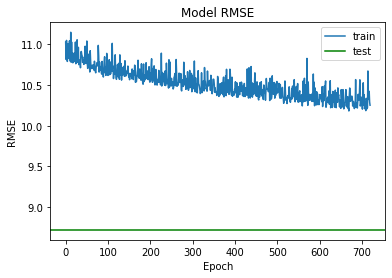

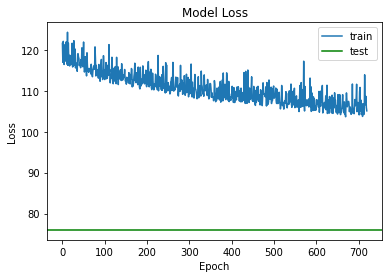

In [154]:
plt.plot(best_history.history['root_mean_squared_error'], label='train')
plt.axhline(test_rmse, color='g', label='test')
plt.title('Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend()
fpath = os.path.join("plots", now + " Model RMSE vs Epoch" + ".png")
if check_file(fpath):
    print("Could not save: {0}\nPossibly change datetime".format(fpath))
else:
    plt.savefig(fpath)
plt.show()

plt.plot(best_history.history['loss'], label='train')
plt.axhline(test_loss, color='g', label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
fpath = os.path.join("plots", now + " Model Loss vs Epoch" + ".png")
if check_file(fpath):
    print("Could not save: {0}\nPossibly change datetime".format(fpath))
else:
    plt.savefig(fpath)
plt.show()

Could not save: plots\2022-04-12 19-56 Overall Acc Predicted and True vs Time.png
Possibly change datetime


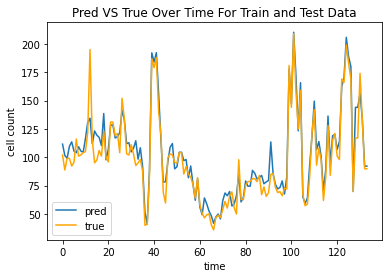

In [156]:
pred = best_model.predict(x_shaped)

plt.plot(pred, label='pred')
plt.plot(y_shaped, color='orange', label='true')
plt.title('Pred VS True Over Time For Train and Test Data')
plt.ylabel('cell count')
plt.xlabel('time')
plt.legend()
fpath = os.path.join("plots", now + " Overall Acc Predicted and True vs Time" + ".png")
if check_file(fpath):
    print("Could not save: {0}\nPossibly change datetime".format(fpath))
else:
    plt.savefig(fpath)
plt.show()
